## Imported Libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',350000)
pd.set_option('display.max_columns',500)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
import xgboost as xgb

## Load Dataset

In [102]:
df = pd.read_csv('Walmart.csv')

## View the first few rows

In [103]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


## View the last few rows

In [104]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


## Shape of dataset

In [105]:
df.shape

(6435, 8)

## Size of dataset

In [106]:
df.size

51480

## Columns of dataset

In [107]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

## Dataset checking data types

In [108]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

## Data information

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


## Label Encoading

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
df['Date']=le.fit_transform(df['Date'])

## After label encoading check data information

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   int32  
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 377.2 KB


## Statistical Summarization of data

In [112]:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,71.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,41.282743,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,0.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,35.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,71.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,107.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,142.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


## Checking null values

In [113]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Checking null values

In [114]:
df.duplicated().sum()

0

## Checking null values

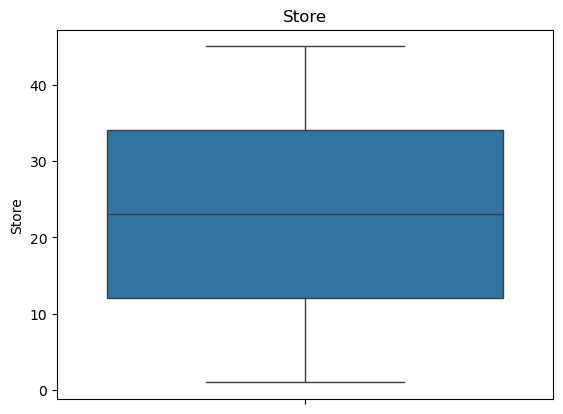

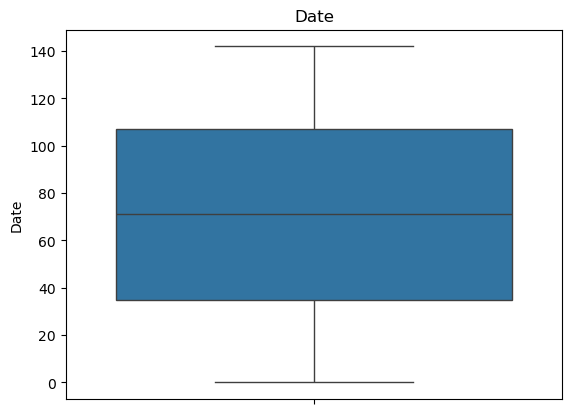

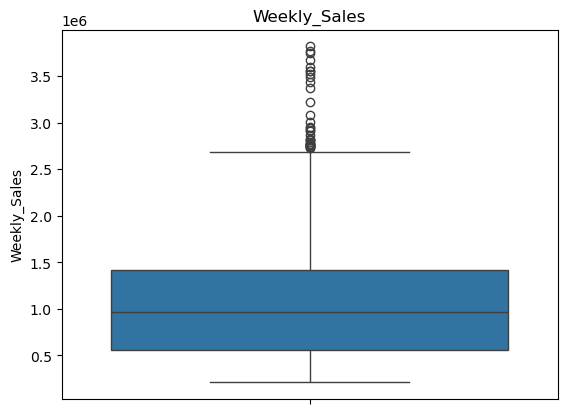

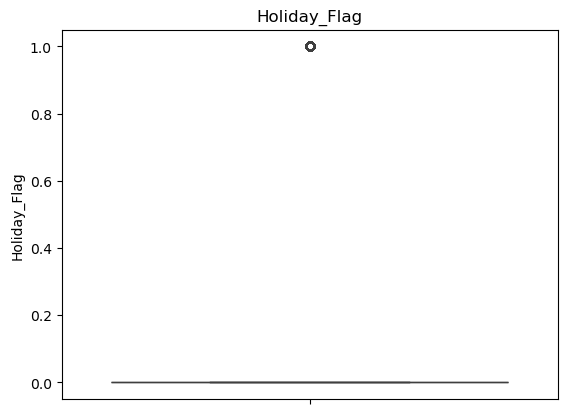

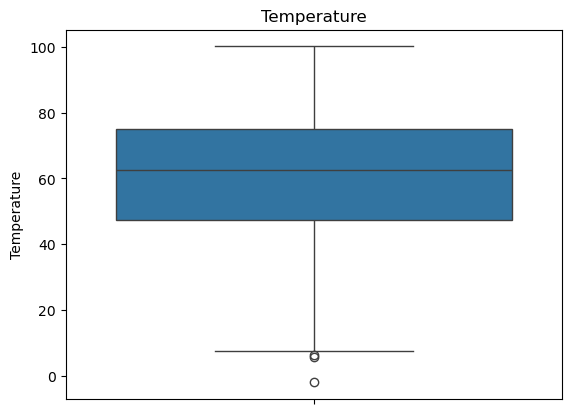

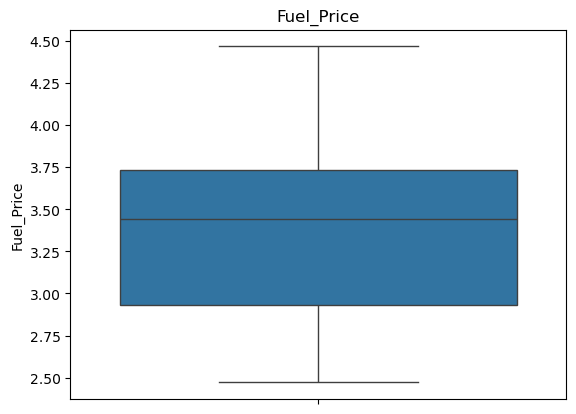

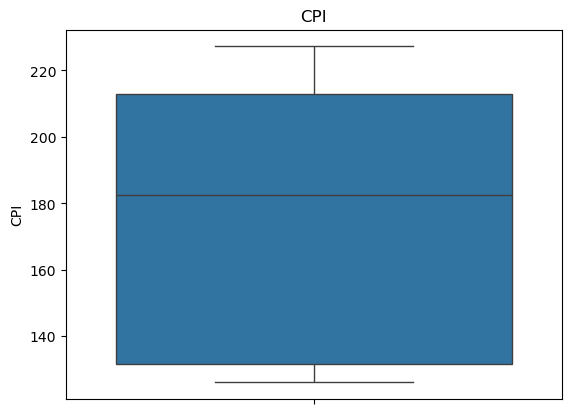

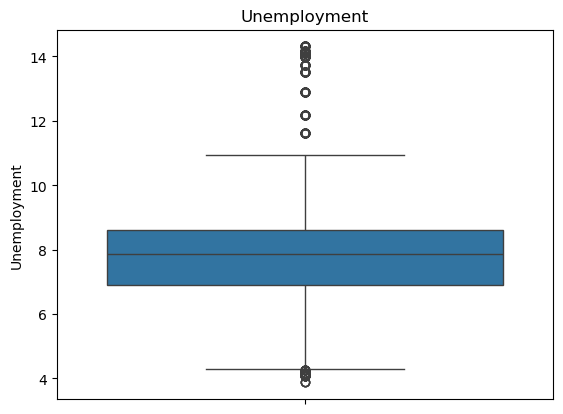

In [115]:
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

## Capping outliers

In [116]:
quantile1=df['Temperature'].quantile(0.25)
quantile3=df['Temperature'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Temperature']=df['Temperature'].clip(upperl,lowerl)
upperl,lowerl

(116.16, 6.240000000000002)

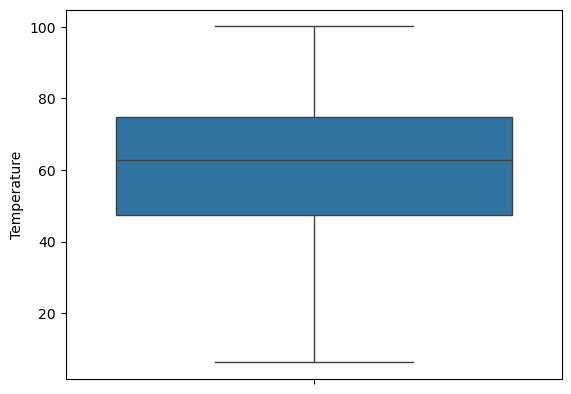

In [117]:
sns.boxplot(df['Temperature'])
plt.show()

In [118]:
quantile1=df['Holiday_Flag'].quantile(0.25)
quantile3=df['Holiday_Flag'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Holiday_Flag']=df['Holiday_Flag'].clip(upperl,lowerl)
upperl,lowerl

(0.0, 0.0)

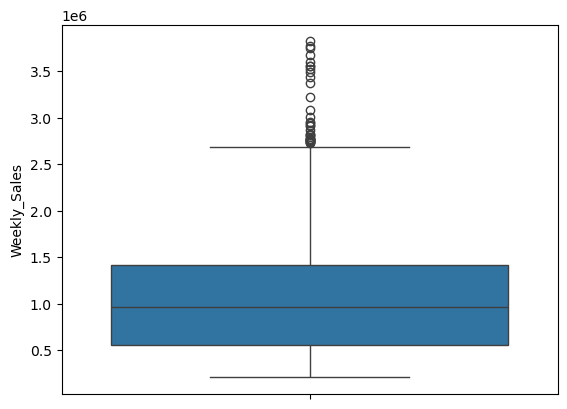

In [119]:
sns.boxplot(df['Weekly_Sales'])
plt.show()

In [120]:
quantile1=df['Unemployment'].quantile(0.25)
quantile3=df['Unemployment'].quantile(0.75)
iqr=quantile3-quantile1
upperl=quantile3+1.5*iqr
lowerl=quantile1-1.5*iqr
df['Unemployment']=df['Unemployment'].clip(upperl,lowerl)
upperl,lowerl

(11.218499999999999, 4.2945)

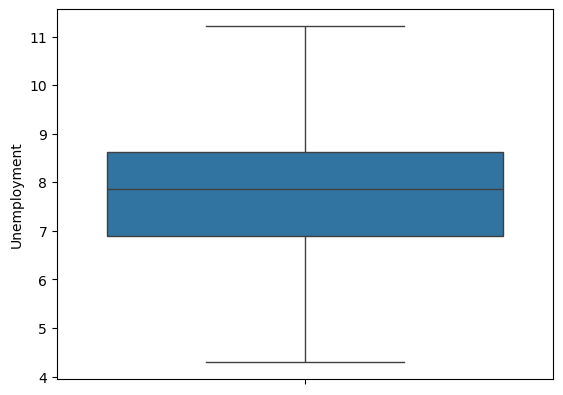

In [121]:
sns.boxplot(df['Unemployment'])
plt.show()

## Checking distribution using distribution plot

## Using a Distribution plot

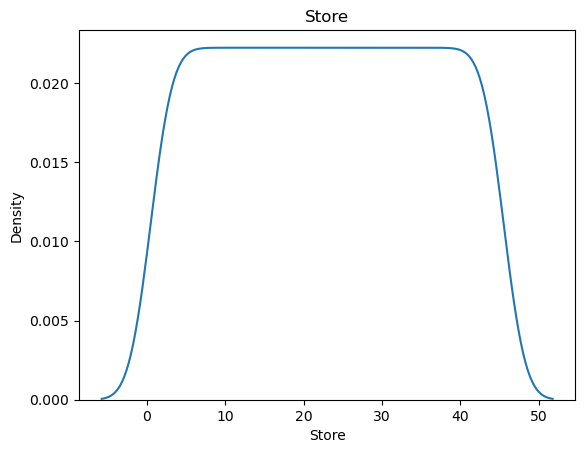

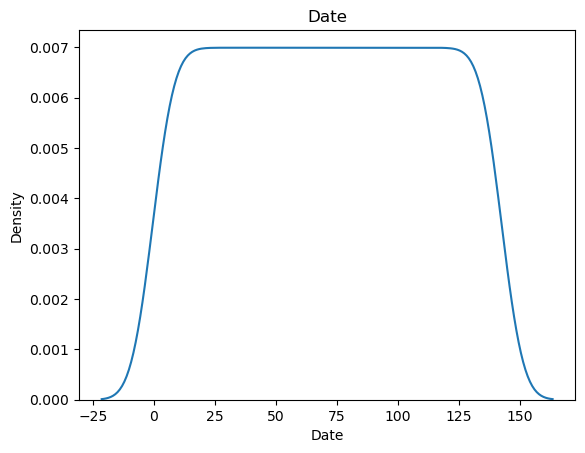

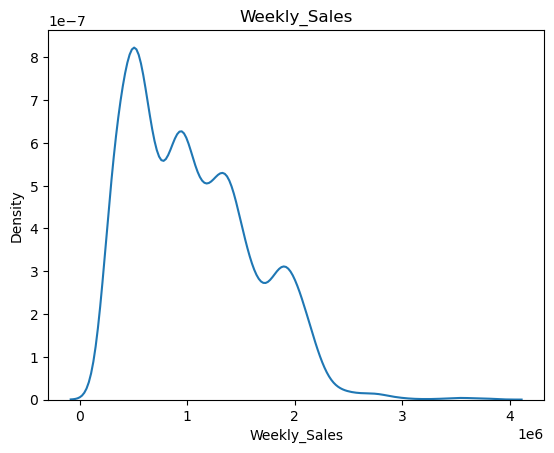

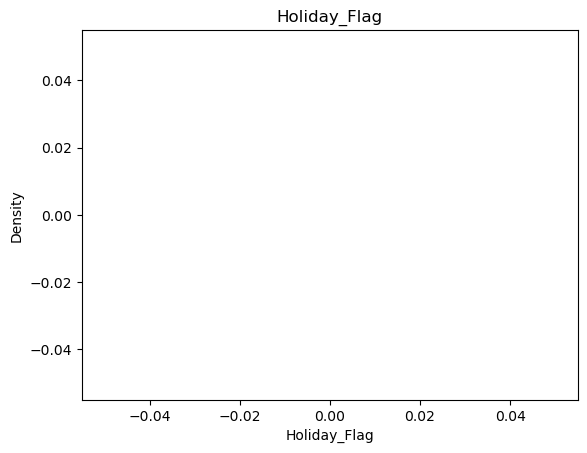

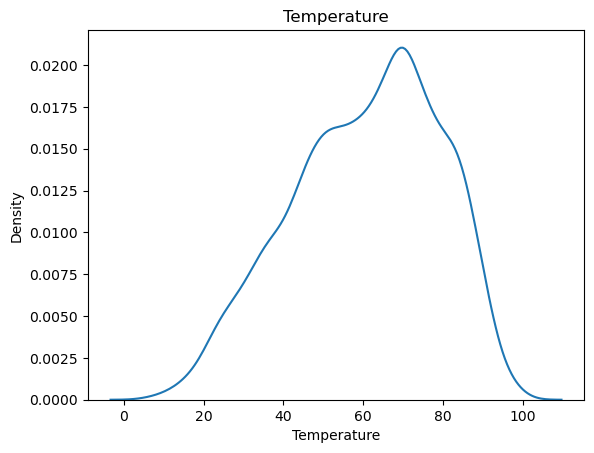

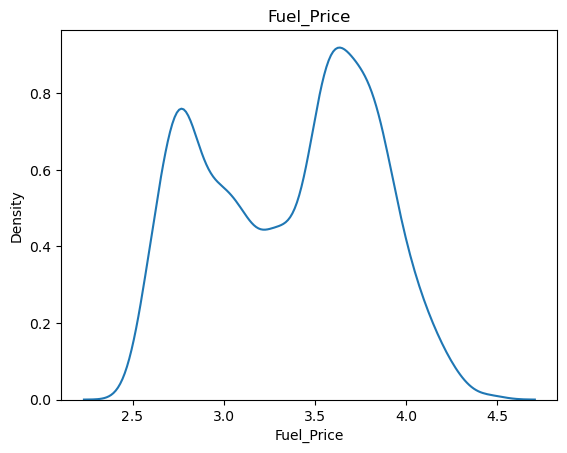

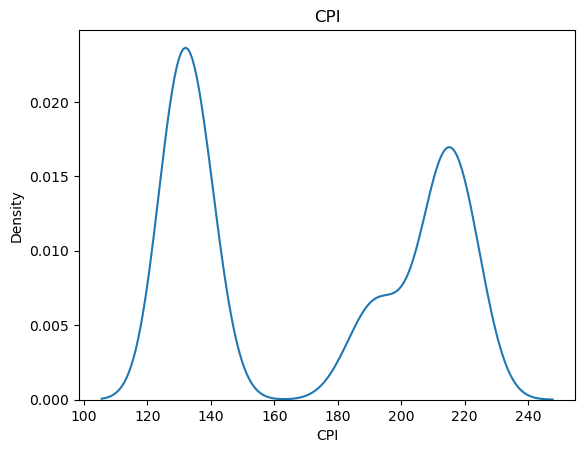

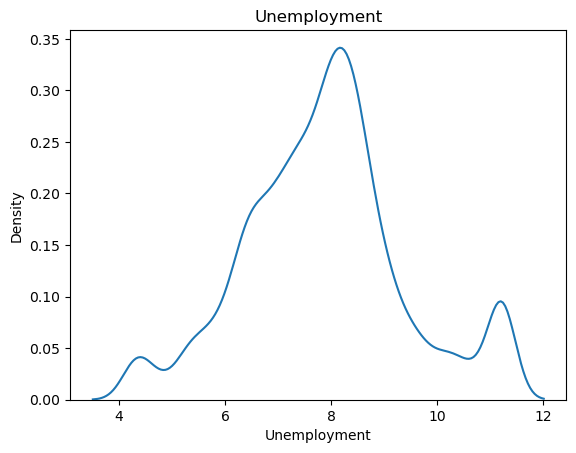

In [122]:
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.distplot(df[i],hist=False)
  plt.show()
#Data is not normally distributed

## Using Histogram plot

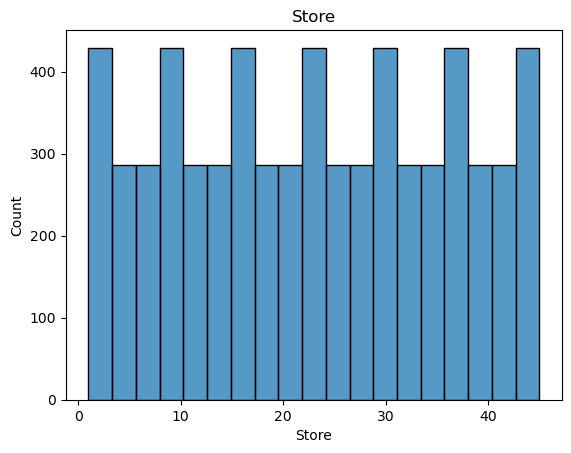

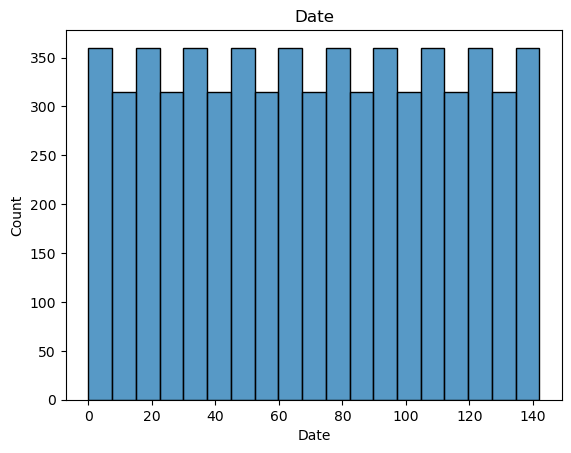

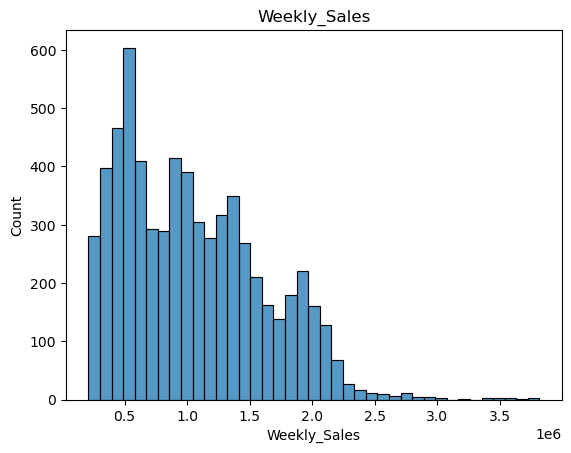

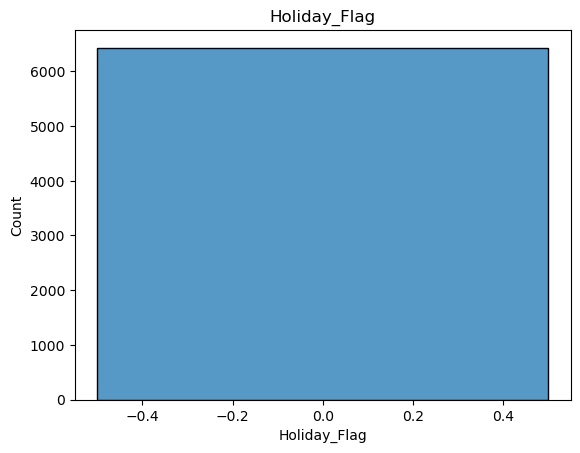

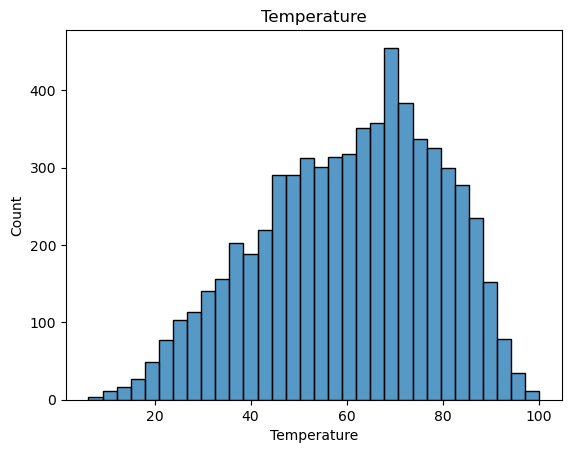

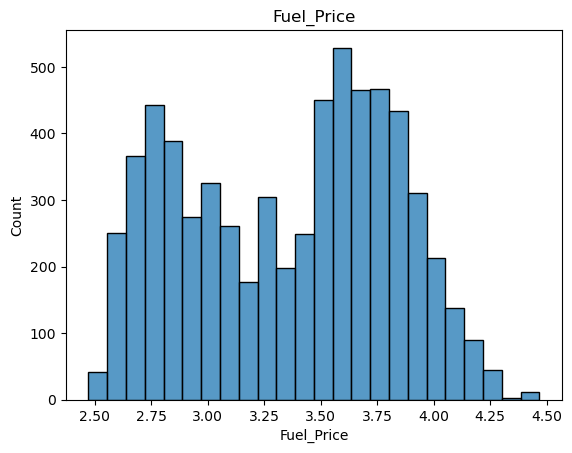

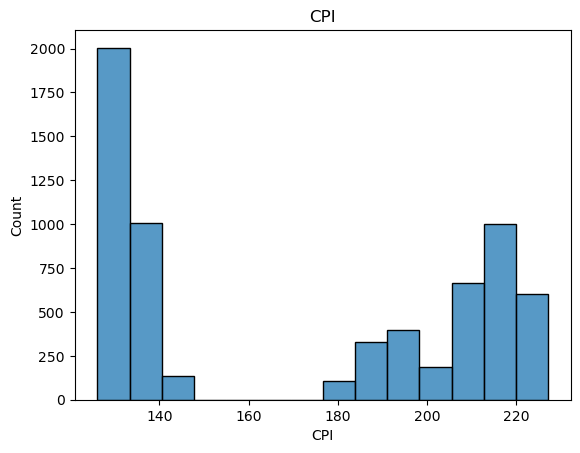

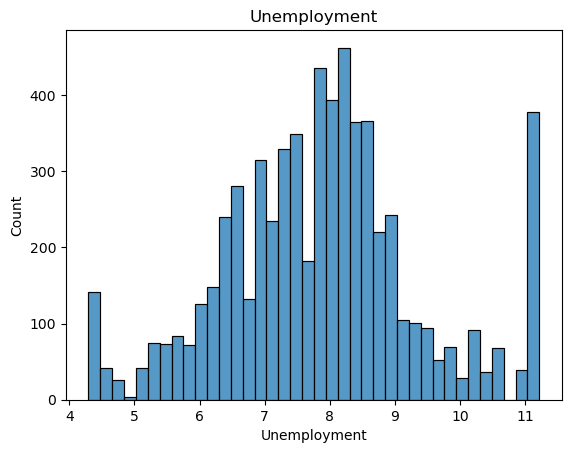

In [123]:
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.histplot(df[i])
  plt.show()

## Using scatter plot checking Correlation

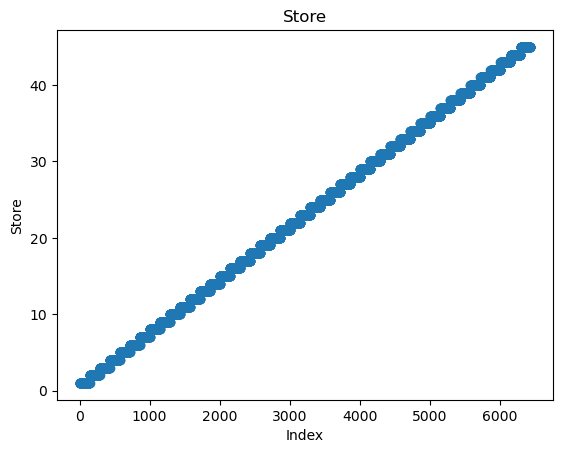

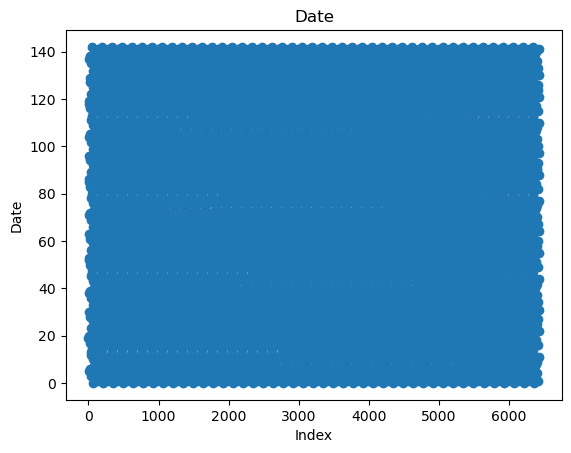

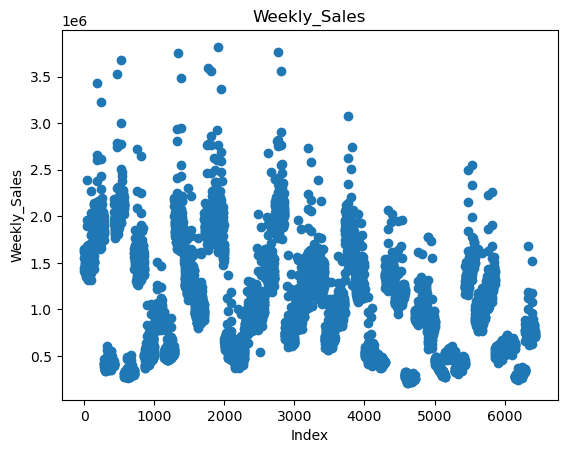

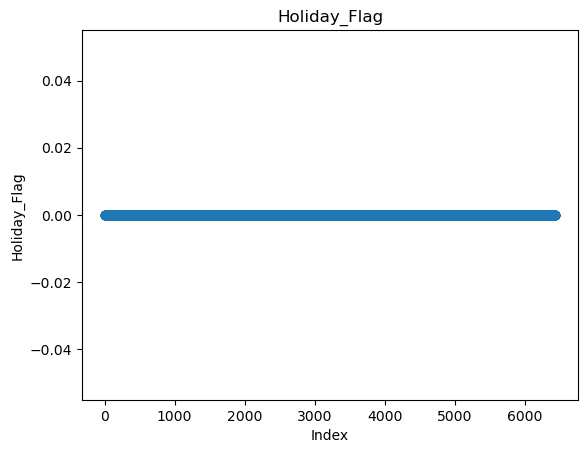

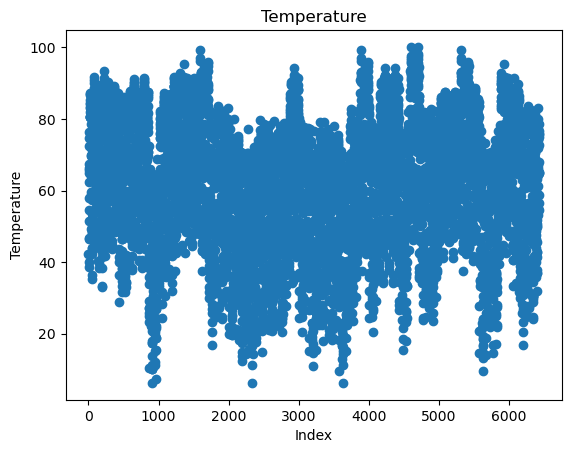

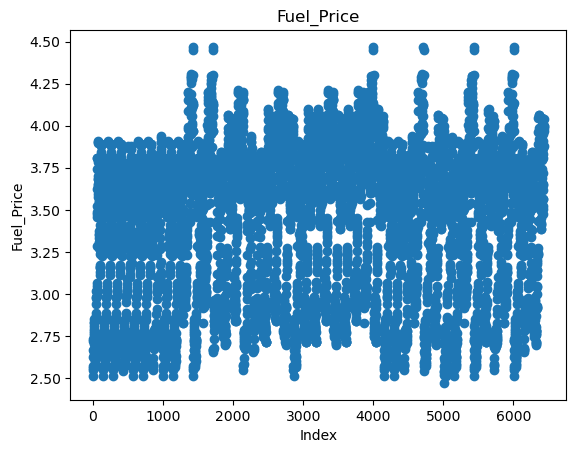

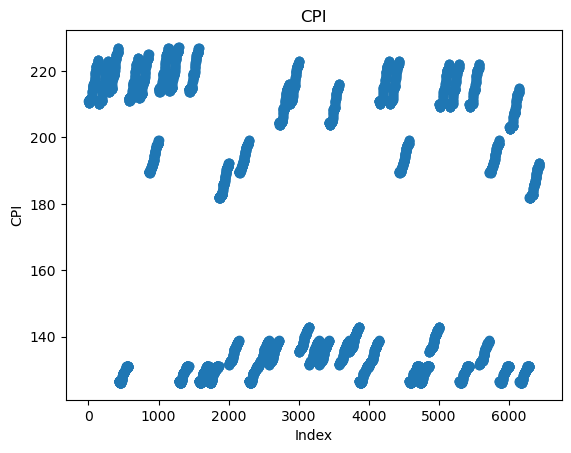

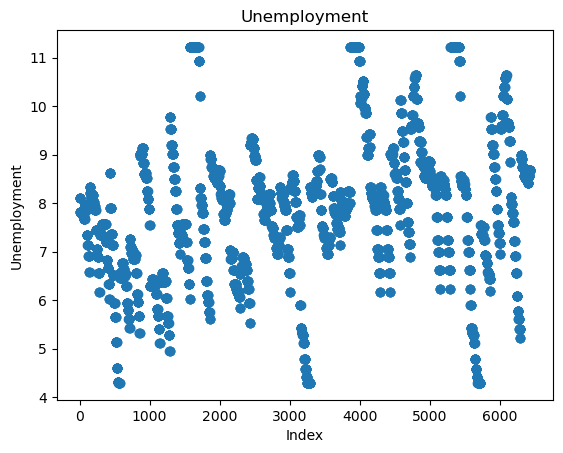

In [124]:
for i in df.select_dtypes(include=np.number).columns:
    plt.title(i)
    plt.scatter(range(len(df[i])), df[i])
    plt.xlabel('Index')
    plt.ylabel(i)
    plt.show()

## Using KDE Plot checking skewness

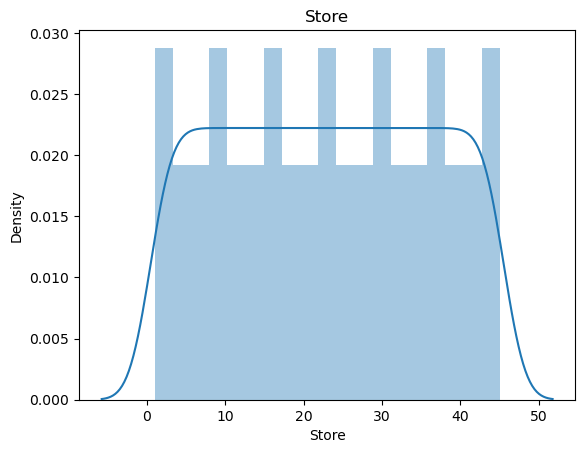

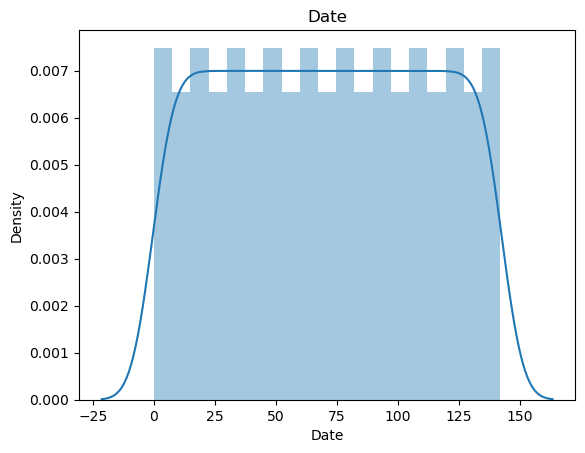

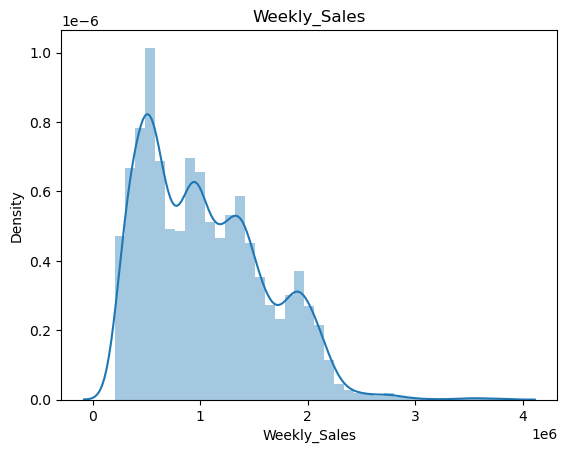

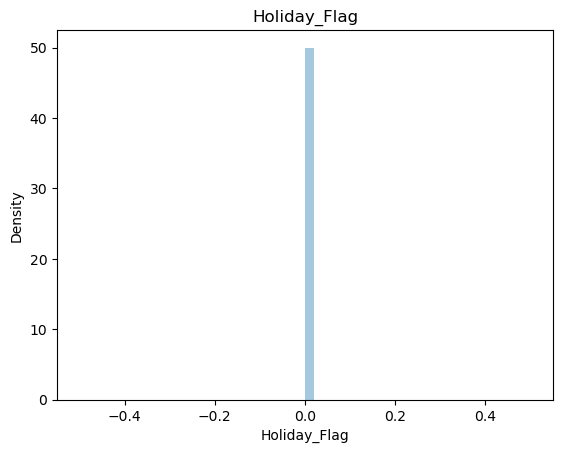

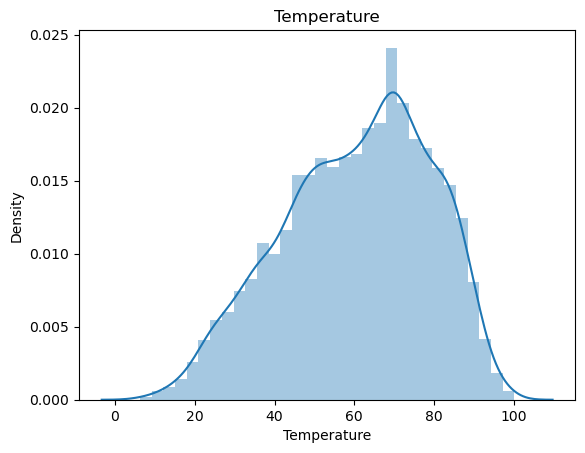

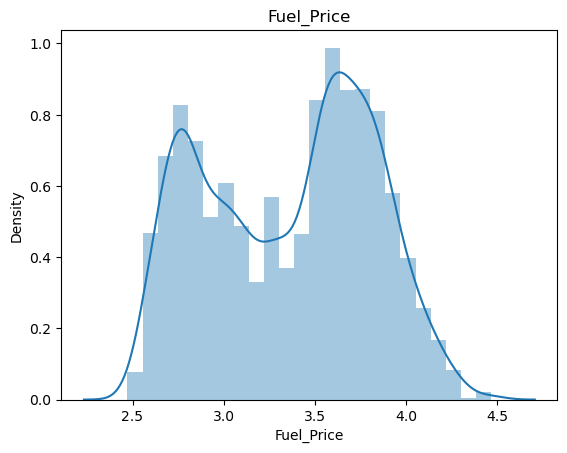

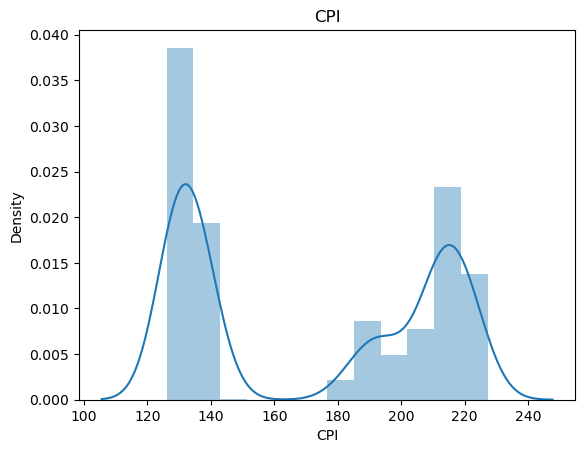

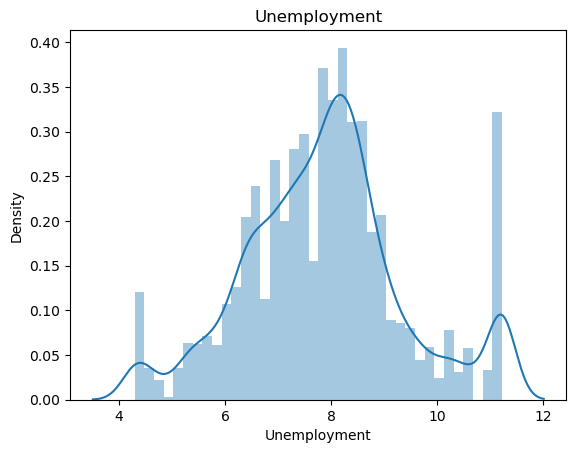

In [125]:
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.distplot(df[i])
  plt.show()

## Preprocessing: Standardizing Numerical Columns with Scikit-learn

In [126]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) 
print(df.head())

      Store  Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0 -1.693979    19      1.057420           0.0    -0.995450   -1.713800   
1 -1.693979    52      1.054348           0.0    -1.201534   -1.766089   
2 -1.693979    85      1.001206           0.0    -1.124524   -1.840166   
3 -1.693979   118      0.642828           0.0    -0.761165   -1.737766   
4 -1.693979    20      0.899914           0.0    -0.768215   -1.598328   

        CPI  Unemployment  
0  1.004175       0.15441  
1  1.007880       0.15441  
2  1.009074       0.15441  
3  1.009849       0.15441  
4  1.010624       0.15441  


## Splitting Dataset into Training and Testing Sets

In [127]:
x=df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Train set:", x_train.shape,y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (5148, 7) (5148,)
Test set: (1287, 7) (1287,)


## Linear regression model

In [128]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print('MAE :',mean_absolute_error(y_test, y_pred))
print('MSE :',mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

MAE : 0.7690990506296074
MSE : 0.8649100117867785
R2 Score: 0.14500853044497863


## Decision Tree Regression model

In [129]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

dt_preds = dt_model.predict(x_test)
print("Decision Tree Preformance: ")
print('MAE :',mean_squared_error(y_test, dt_preds))
print('R2 Score:', r2_score(y_test, dt_preds))

Decision Tree Preformance: 
MAE : 0.12182096323130513
R2 Score: 0.8795760449568957


## Random Forest Regression Model

In [130]:
rf_model = RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

rf_preds = rf_model.predict(x_test)
print("\n Rnadom Forest Performance: ")
print("MSE :", mean_squared_error(y_test,rf_preds))        
print("R2 Score:", r2_score(y_test,rf_preds))


 Rnadom Forest Performance: 
MSE : 0.06648444726725003
R2 Score: 0.9342779774809766


## ridge Regression model 

In [131]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
ridge_preds = ridge_model.predict(x_test)
print('\n Ridge Regression Performance: ')
print('MSE:', r2_score(y_test,ridge_preds))
print('R2 score', r2_score(y_test,ridge_preds))


 Ridge Regression Performance: 
MSE: 0.14500816032645591
R2 score 0.14500816032645591


## Lasso Regression model

In [132]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_train, y_train)
lasso_preds = lasso_model.predict(x_test)
print('\n Lasso Regression Performance: ')
print('MSE:', r2_score(y_test,lasso_preds))
print('R2 score', r2_score(y_test,lasso_preds))


 Lasso Regression Performance: 
MSE: 0.14456553406201433
R2 score 0.14456553406201433


## ElasticNet Regression model

In [133]:
elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_model.fit(x_train, y_train)
elastic_preds = elastic_model.predict(x_test)
print('\n ElasticNet Regression Performance: ')
print('MSE:', r2_score(y_test,elastic_preds))
print('R2 score', r2_score(y_test,elastic_preds))


 ElasticNet Regression Performance: 
MSE: 0.14494729003115048
R2 score 0.14494729003115048


## Support Vector Regression (SVR) 

In [134]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svr = SVR(kernel ="rbf", C=100, epsilon=0.1)
svr.fit(x_train_scaled,y_train)
y_pred_svr = svr.predict(x_test_scaled)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test,y_pred_svr)))

SVR RMSE: 0.6776215367209412


## Gredient Boosting Regression

In [135]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
print('Gradient Boosting RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_gbr)))

Gradient Boosting RMSE: 0.3574482687585181


## XGBoost Regression

In [136]:
xbr = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xbr.fit(x_train,y_train)
y_pred_xbr = xbr.predict(x_test)
print('XGBoost RMSE:', np.sqrt(mean_squared_error(y_test,y_pred_xbr)))

XGBoost RMSE: 0.34667332191905575


## Adaboost Regression

In [ ]:
abr = AdaBoostRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
abr.fit(x_train, y_train)
y_pred_abr = abr.predict(x_test)
print("AdaBoost RMSE :", np.sqrt(mean_squared_error(y_test,y_pred_abr)))

## Summary of all Models

In [ ]:
summary = pd.DataFrame({
    'Actual spotify': y_test,
    'Decision Tree Prediction': dt_preds,
    'Random Forest Prediction': rf_preds,
    "linear regression prediction": y_pred,
    "ridge prediction": ridge_preds,
    "lasso prediction": lasso_preds,
    "elasticnet prediction": elastic_preds,
    "SVR prediction": y_pred_svr,
    "Gredient Boosting Prediction": y_pred_gbr,
    "XGBoost Prediction": y_pred_xbr,
    "Adaboost Prediction": y_pred_abr
})
print("\n Prediction Summery:")
summary.head()

1. XGBoost Prediction:
Generally provides values close to actual ones (e.g., for row 233, XGBoost predicts 1.281335, which is close to the actual 1.299710).
Works well for higher values.
Seems to be among the most stable models.
2. Gradient Boosting Prediction:
Also performs well in most cases.
Slightly worse than XGBoost but still better than linear models.
3. Random Forest Prediction:
Performs decently but seems to overestimate in some cases.
Example: For row 3361, it predicts 0.586391, which is much higher than the actual 0.466254.
4. Linear Models (Linear Regression, Ridge, Lasso, ElasticNet):
These models struggle with extreme values.
Example: For row 233, they predict around 0.359, which is way off from the actual 1.299710.
5. SVR & Adaboost:
SVR is inconsistent, and Adaboost performs poorly in multiple cases (especially row 5011).

Best Model Based on Predictions:
XGBoost > Gradient Boosting > Random Forest